## Import

In [2]:
# Matplotlib
import matplotlib.pyplot
# Tensorflow
import tensorflow
# Numpy and Pandas
import numpy
import pandas
# Ohter import
import sys

## Be sure to used Tensorflow 2.0

In [4]:
assert hasattr(tensorflow, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [16]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tensorflow.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

(10000, 784)
(10000,)


## Plot one of the data

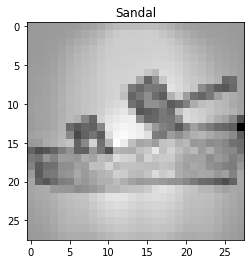

In [32]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
matplotlib.pyplot.imshow(numpy.reshape(images[12], (28, 28)), cmap="binary")
matplotlib.pyplot.title(targets_names[targets[13]])
matplotlib.pyplot.show()

# Create the model
![](images/simple_nn.png)

# Create the model

In [34]:
# Flatten
model = tensorflow.keras.models.Sequential()

# Add the layers
model.add(tensorflow.keras.layers.Dense(256, activation="relu"))
model.add(tensorflow.keras.layers.Dense(128, activation="relu"))
model.add(tensorflow.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.09655568 0.00934271 0.06220656 0.2370883  0.01681989 0.01151555
  0.00467264 0.01838324 0.12996402 0.4134515 ]] [9]


## Model Summary

In [36]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              multiple                  200960    
_________________________________________________________________
dense_10 (Dense)             multiple                  32896     
_________________________________________________________________
dense_11 (Dense)             multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [43]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [44]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 64us/sample - loss: 0.5381 - accuracy: 0.8165 - val_loss: 0.5872 - val_accuracy: 0.7975
Epoch 2/10
8000/8000 [==============================] - 1s 68us/sample - loss: 0.5230 - accuracy: 0.8200 - val_loss: 0.5755 - val_accuracy: 0.8010
Epoch 3/10
8000/8000 [==============================] - 1s 66us/sample - loss: 0.5097 - accuracy: 0.8239 - val_loss: 0.5651 - val_accuracy: 0.8035
Epoch 4/10
8000/8000 [==============================] - 1s 72us/sample - loss: 0.4977 - accuracy: 0.8273 - val_loss: 0.5548 - val_accuracy: 0.8060
Epoch 5/10
8000/8000 [==============================] - 1s 75us/sample - loss: 0.4867 - accuracy: 0.8314 - val_loss: 0.5471 - val_accuracy: 0.8035
Epoch 6/10
8000/8000 [==============================] - 1s 65us/sample - loss: 0.4770 - accuracy: 0.8354 - val_loss: 0.5400 - val_accuracy: 0.8060
Epoch 7/10
8000/8000 [==============================] - 0s 57us/sample

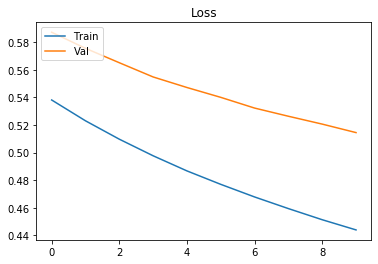

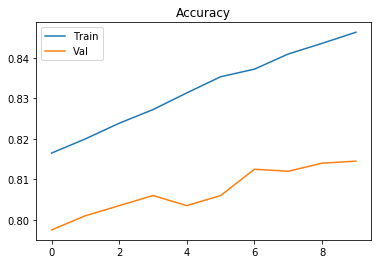

In [45]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

matplotlib.pyplot.plot(loss_curve, label="Train")
matplotlib.pyplot.plot(loss_val_curve, label="Val")
matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.title("Loss")
matplotlib.pyplot.show()

matplotlib.pyplot.plot(acc_curve, label="Train")
matplotlib.pyplot.plot(acc_val_curve, label="Val")
matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.title("Accuracy")
matplotlib.pyplot.show()

In [46]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.5329 - accuracy: 0.8123
Test Loss 0.532907742023468
Test Accuracy 0.8123
